In [1]:
import Mors as mors
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nbimporter
import Functions as fun
import os

In [9]:
#test massLost
def findFlux(ages,stars,chz):
    '''
    efficiency: float, ranges from 0.1-0.3
    ages: 1D array of the range of ages of the star in Myr
    M_pl: float, mass of the planet in Earth masses
    R_pl: float, radius of the planet in Earth radii
    stars: 1D array of Mors Star objects
    chz: 1D array, the distance in AU of the Continuously Habitable Zone for each mass star. Can be found by taking the mean of findHZ()

    Returns M_rem: a 1D array of the %mass remaining over time
    '''

    #Get the Lx and Leuv tracks. These are dictionaries.
    Lx_dict = fun.LxTrack(ages, stars)
    Leuv_dict = fun.LeuvTrack(ages, stars)

    #F=L/4pir^2
    #CHZ to cm
    #I want the order of the CHZ values to match the order of the masses of the loaded stars
    
    r = np.array(chz * 1.496E13) #cm

    
    #calculate fluxes
    flux = (np.array(list(Lx_dict.values())) + np.array(list(Leuv_dict.values())))/(4 * np.pi * r[:, np.newaxis]**2)
    return flux

In [23]:
file_path1 = 'rp25/p25_m0.3.pickle'
file_path2 = 'rp50/p50_m0.3.pickle'
file_path3 = 'rp75/p75_m0.3.pickle'
small_stars = []
small_stars.append(mors.Load(file_path1))
small_stars.append(mors.Load(file_path2))
small_stars.append(mors.Load(file_path3))


file_path1 = 'rp25/p25_m0.6.pickle'
file_path2 = 'rp50/p50_m0.6.pickle'
file_path3 = 'rp75/p75_m0.6.pickle'
medium_stars = []
medium_stars.append(mors.Load(file_path1))
medium_stars.append(mors.Load(file_path2))
medium_stars.append(mors.Load(file_path3))


file_path1 = 'rp25/p25_m1.0.pickle'
file_path2 = 'rp50/p50_m1.0.pickle'
file_path3 = 'rp75/p75_m1.0.pickle'
big_stars = []
big_stars.append(mors.Load(file_path1))
big_stars.append(mors.Load(file_path2))
big_stars.append(mors.Load(file_path3))

In [45]:
ages = np.linspace(50,5000,10000)
data = pd.read_csv('updated.csv')
masses,chz = data['Mass'],data['CHZ']
chz03 = data['CHZ'][data['Mass']==0.3]
chz06 = data['CHZ'][np.round(data['Mass'],2)==0.60]
chz10 = data['CHZ'][np.round(data['Mass'],2)==1.0]

In [46]:
chz10

70    1.159566
Name: CHZ, dtype: float64

Text(0, 0.5, 'Flux (erg/s/cm^2)')

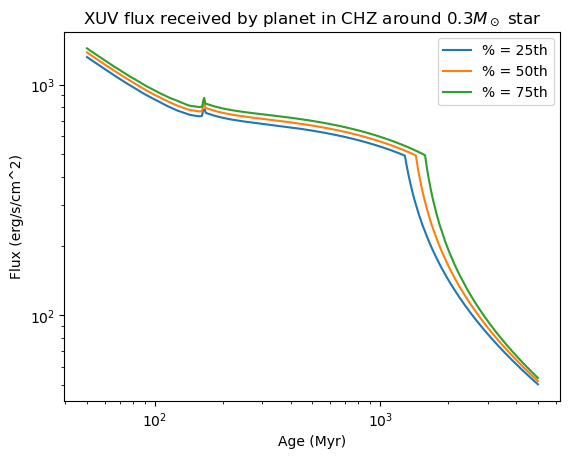

In [25]:
flux03 = findFlux(ages,small_stars,chz03)
plt.plot(ages,flux03[0],label='% = 25th')
plt.plot(ages,flux03[1],label='% = 50th')
plt.plot(ages,flux03[2],label='% = 75th')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.title(r'XUV flux received by planet in CHZ around $0.3M_\odot$ star')
plt.xlabel('Age (Myr)')
plt.ylabel('Flux (erg/s/cm^2)')

Text(0, 0.5, 'Flux (erg/s/cm^2)')

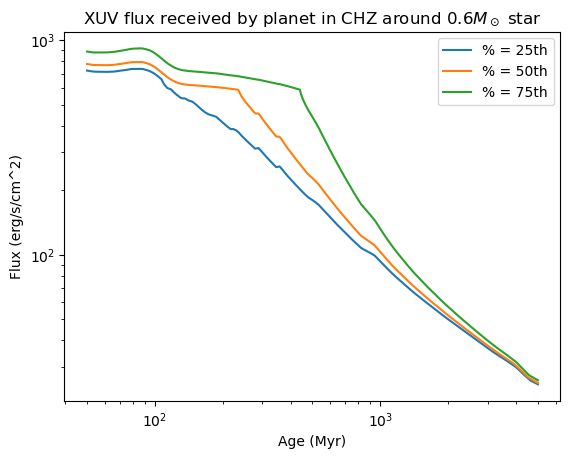

In [48]:
flux06 = findFlux(ages,medium_stars,chz06)
plt.plot(ages,flux06[0],label='% = 25th')
plt.plot(ages,flux06[1],label='% = 50th')
plt.plot(ages,flux06[2],label='% = 75th')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.title(r'XUV flux received by planet in CHZ around $0.6M_\odot$ star')
plt.xlabel('Age (Myr)')
plt.ylabel('Flux (erg/s/cm^2)')

Text(0, 0.5, 'Flux (erg/s/cm^2)')

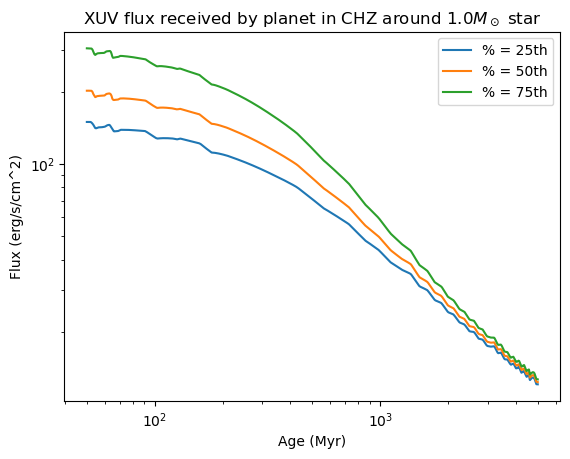

In [50]:
flux10 = findFlux(ages,big_stars,chz10)
plt.plot(ages,flux10[0],label='% = 25th')
plt.plot(ages,flux10[1],label='% = 50th')
plt.plot(ages,flux10[2],label='% = 75th')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.title(r'XUV flux received by planet in CHZ around $1.0M_\odot$ star')
plt.xlabel('Age (Myr)')
plt.ylabel('Flux (erg/s/cm^2)')

Text(0, 0.5, 'Flux (erg/s/cm^2)')

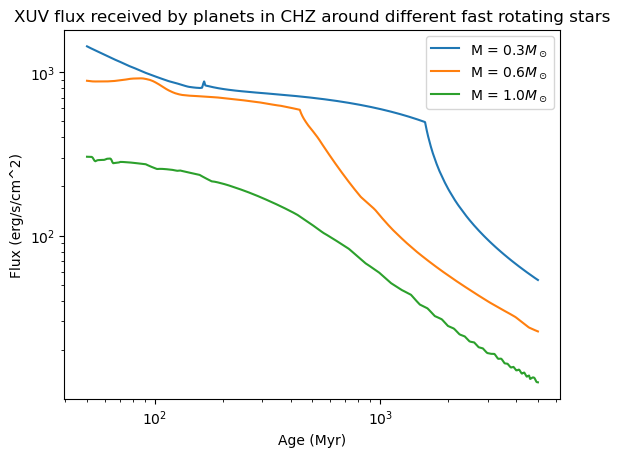

In [52]:
plt.plot(ages,flux03[2],label=r'M = 0.3$M_\odot$')
plt.plot(ages,flux06[2],label=r'M = 0.6$M_\odot$')
plt.plot(ages,flux10[2],label=r'M = 1.0$M_\odot$')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.title(r'XUV flux received by planets in CHZ around different fast rotating stars')
plt.xlabel('Age (Myr)')
plt.ylabel('Flux (erg/s/cm^2)')